# **STEP 1 - Importing Libraries**

In [53]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


# **Step - 2 Importing Dataset**

In [54]:
dataset = pd.read_csv('Mall_Customers.csv')
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


# **STEP - 3 Data Preprocessing**

Converting "Gender" to Numeric value


In [55]:
dataset['Gender'] = dataset['Gender'].map({"Male":0, "Female":1})
dataset.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,0,19,15,39
1,2,0,21,15,81
2,3,1,20,16,6
3,4,1,23,16,77
4,5,1,31,17,40


# Remove ID column

In [56]:
dataset = dataset.drop('CustomerID', axis=1)
dataset.head()

,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,0,19,15,39
1,0,21,15,81
2,1,20,16,6
3,1,23,16,77
4,1,31,17,40


# **STEP - 4 Feature Scaling**

In [57]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_scaled = sc.fit_transform(dataset)


# **STEP - 5 Choose Number of Clusters**

**1 - Elbow Method**

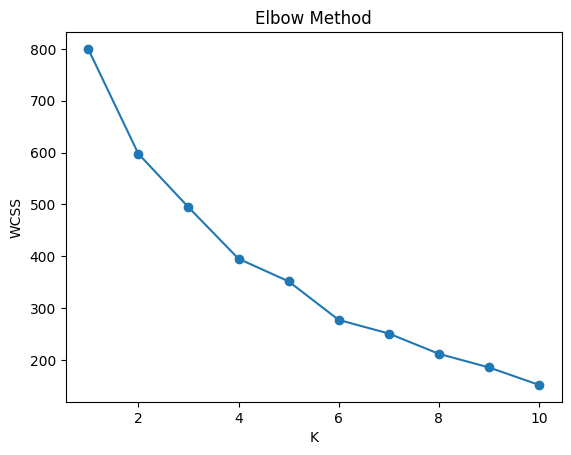

In [58]:
from sklearn.cluster import KMeans
wcss = []
for k in range(1,11):
  km = KMeans(n_clusters=k, init='k-means++', random_state=42)
  km.fit(X_scaled)
  wcss.append(km.inertia_)

plt.plot(range(1,11), wcss, marker='o')
plt.xlabel("K")
plt.ylabel("WCSS")
plt.title("Elbow Method")
plt.show()

# **Silhouette Score**

In [59]:
from sklearn.metrics import silhouette_score

for k in range(2,11):
    km = KMeans(n_clusters=k, random_state=42)
    labels = km.fit_predict(X_scaled)
    score = silhouette_score(X_scaled, labels)
    print(f"K={k}, Silhouette={score:.3f}")

K=2, Silhouette=0.278
K=3, Silhouette=0.258
K=4, Silhouette=0.290
K=5, Silhouette=0.272
K=6, Silhouette=0.335
K=7, Silhouette=0.346
K=8, Silhouette=0.373
K=9, Silhouette=0.388
K=10, Silhouette=0.421


# **STEP - 6 Train Final KMeans++**

In [60]:
optimal_k = 6

kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42, n_init=10)
y_kmeans = kmeans.fit_predict(X_scaled)

dataset['Clusters'] = y_kmeans

# **STEP - 7 Evaluate Model Quality**

In [61]:
from sklearn.metrics import davies_bouldin_score, calinski_harabasz_score

labels = dataset["Clusters"]

print("Silhouette Score:",
      silhouette_score(X_scaled, labels))

print("Davies-Bouldin Index:",
      davies_bouldin_score(X_scaled, labels))

print("Calinski-Harabasz Score:",
      calinski_harabasz_score(X_scaled, labels))


Silhouette Score: 0.33107393337175933
Davies-Bouldin Index: 1.0176669066561006
Calinski-Harabasz Score: 73.49623534335936


Silhouette Score: 0.33107393337175933
Davies-Bouldin Index: 1.0176669066561006
Calinski-Harabasz Score: 73.49623534335936
K=6

Silhouette Score: 0.2983972818544038
Davies-Bouldin Index: 1.2806535165974404
Calinski-Harabasz Score: 69.12579977081549
K=4

Silhouette Score: 0.3040600988258827
Davies-Bouldin Index: 1.1672300848200368
Calinski-Harabasz Score: 68.96456847863874
K=5


# Silhouette Score: Higher the better
# Davies-Bouldin Index: Lower the better
# Calinski-Harabasz Score: Higher the better

# **STEP - 8 Cluster Profiling**

In [62]:
Cluster_profile = dataset.groupby("Clusters").mean().round()

In [63]:
Cluster_profile.sort_values(by="Spending Score (1-100)", ascending=False)

,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
4,1.0,32.0,90.0,81.0
1,0.0,28.0,58.0,71.0
2,1.0,26.0,40.0,60.0
0,1.0,51.0,50.0,40.0
3,0.0,56.0,53.0,36.0
5,1.0,36.0,90.0,18.0


# **STEP - 9 Visualization (ONLY FOR UNDERSTANDING)**

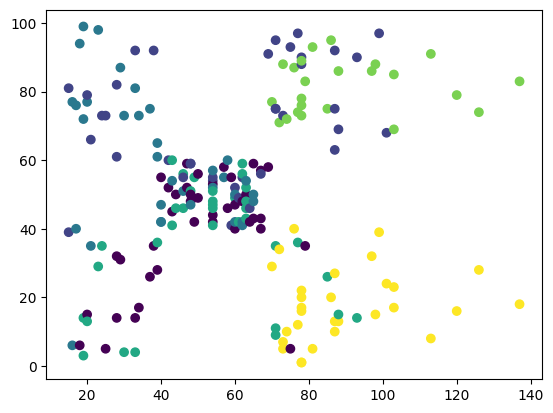

In [64]:
plt.scatter(
    dataset["Annual Income (k$)"],
    dataset["Spending Score (1-100)"],
    c=dataset["Clusters"]
)


In [65]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(dataset.drop("Clusters", axis=1))


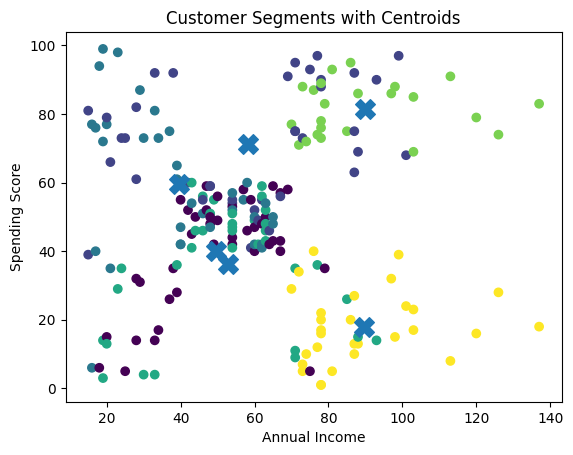

In [66]:
plt.scatter(
    dataset["Annual Income (k$)"],
    dataset["Spending Score (1-100)"],
    c=dataset["Clusters"]
)

# Get centroids in original scale
centroids_original = scaler.inverse_transform(kmeans.cluster_centers_)

plt.scatter(
    centroids_original[:,2],   # Annual Income column index
    centroids_original[:,3],   # Spending Score column index
    marker="X",
    s=200
)

plt.xlabel("Annual Income")
plt.ylabel("Spending Score")
plt.title("Customer Segments with Centroids")
plt.show()


# **STEP - 10 Stability Check**

In [67]:
scores = []

for seed in range(5):
    km = KMeans(n_clusters=6, random_state=seed)
    labels = km.fit_predict(X_scaled)
    scores.append(silhouette_score(X_scaled, labels))

print(scores)


[np.float64(0.30496248977043017), np.float64(0.30909628228442027), np.float64(0.33432134408851794), np.float64(0.3293595727270178), np.float64(0.3383245459137872)]


# **STEP 11 — Business Decisions (FINAL OUTPUT)**

In [68]:
(Cluster_profile.sort_values(by="Spending Score (1-100)", ascending=False)).sort_values(by="Annual Income (k$)", ascending=False)


,Gender,Age,Annual Income (k$),Spending Score (1-100)
Clusters,,,,
4,1.0,32.0,90.0,81.0
5,1.0,36.0,90.0,18.0
1,0.0,28.0,58.0,71.0
3,0.0,56.0,53.0,36.0
0,1.0,51.0,50.0,40.0
2,1.0,26.0,40.0,60.0


**Logic of segmentation<br>**
IF Income high AND Spending high → Premium Customers<br>
IF Income high AND Spending low → Wealthy Savers<br>
IF Income low AND Spending high → Impulse Buyers<br>
IF Income medium AND Spending medium → Regular Customers


In [69]:
def assign_remark(row):

    income = row["Annual Income (k$)"]
    spending = row["Spending Score (1-100)"]

    # Income rule
    if income >= 70:
        income_level = "High Income"
    elif income >= 50:
        income_level = "Medium Income"
    else:
        income_level = "Low Income"

    # Spending rule
    if spending >= 70:
        spending_level = "High Spending"
    elif spending >= 40:
        spending_level = "Medium Spending"
    else:
        spending_level = "Low Spending"

    return f"{income_level} - {spending_level}"


Cluster_profile["Remarks"] = Cluster_profile.apply(assign_remark, axis=1)


In [70]:
dataset = dataset.merge(
    Cluster_profile[['Remarks']],
    left_on='Clusters',
    right_index=True
)


In [71]:
dataset

,Gender,Age,Annual Income (k$),Spending Score (1-100),Clusters,Remarks
0,0,19,15,39,1,Medium Income - High Spending
1,0,21,15,81,1,Medium Income - High Spending
2,1,20,16,6,2,Low Income - Medium Spending
3,1,23,16,77,2,Low Income - Medium Spending
4,1,31,17,40,2,Low Income - Medium Spending
...,...,...,...,...,...,...
195,1,35,120,79,4,High Income - High Spending
196,1,45,126,28,5,High Income - Low Spending
197,0,32,126,74,4,High Income - High Spending
198,0,32,137,18,5,High Income - Low Spending
